In [ ]:
df.column.nunique() # count only unique values , simple unique() gives unique values.

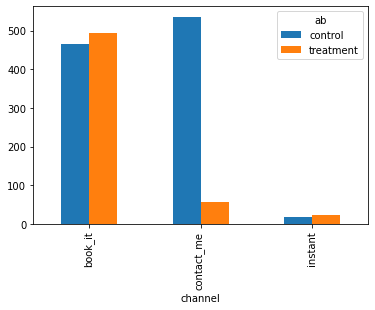

In [24]:
# Very effectice to plot a graph directly ,Return reshaped DataFrame organized by given index / column values.
df.pivot(values = 'booked',index = 'channel',columns = 'ab').plot(kind = 'bar')

In [1]:
# We have used np.where() function below.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
Sd = pd.read_csv(r'C:\BEPEC Python Material\Student.csv')
Sd

<IPython.core.display.Javascript object>

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Details of Data Set

In [3]:
# Gender           : Unique(2), Total = 1000 , Mismatched/null(0) , most common (female 52%)
# race               : Unique(5), Total = 1000 , Mismatched/null(0) , most common (group C 32%)
# ParentEducation  : Unique(6), Total = 1000 , Mismatched/null(0) , most common (some college 23%)
# lunch              : Unique(2), Total = 1000 , Mismatched/null(0) , most common (standard 65%)
# test preparation : Unique(2), Total = 1000 , Mismatched/null(0) , most common (none 64%)

In [4]:
# Math : valid(100%), mean(66.1), std(15.2), Quantiles[min(0), max(100), 25%(57), 50%(66), 75%(77)]
# Reading : valid(100%), mean(69.2), std(14.6), Quantiles[min(17), max(100), 25%(59), 50%(70), 75%(79)]
# writng Score : valid(100%), mean(68.1), std(15.2), Quantiles[min(10), max(100), 25%(58), 50%(69), 75%(79)]

In [5]:
Sd.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
criteria = 40
Sd.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
Sd['math status'] = np.where(Sd['math score']<40,'F','P')
Sd['reading status'] = np.where(Sd['reading score']<40,'F','P')
Sd['writing status'] = np.where(Sd['writing score']<40,'F','P')

In [8]:
Sd.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P


In [9]:
Sd['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
Sd = Sd.rename(columns = ({'race/ethnicity':'race','parental level of education':'parent'}))

In [11]:
Sd.head()

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P


In [12]:
df = Sd.groupby(Sd.gender).agg({'math score':'mean','reading score':'mean','writing score':'mean'})
df

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


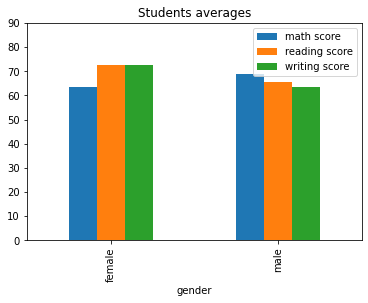

In [13]:
df.plot.bar(title = 'Students averages', ylim = (0,90))


<BarContainer object of 2 artists>

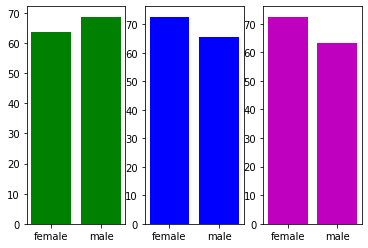

In [14]:
plt.subplot(131)
plt.bar(df.index,df['math score'],color = 'g')
plt.subplot(132)
plt.bar(df.index,df['reading score'],color = 'b')
plt.subplot(133)
plt.bar(df.index,df['writing score'],color = 'm')

,pies
Dad,10
Mam,10
Bro,42
Sis,17
Me,37


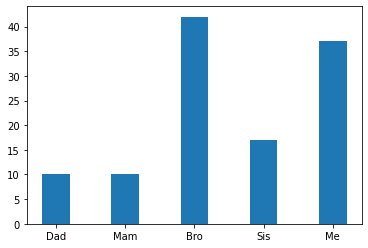

In [15]:
plotdata = pd.DataFrame(
    {"pies": [10, 10, 42, 17, 37]}, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"])
# Plot a bar chart
#plotdata.plot(kind="bar")
plt.bar(plotdata.index,plotdata.pies, width = 0.4)
plotdata

In [16]:
Sd.head(3)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P


In [17]:
Sd['ovrall pass'] = Sd.apply(lambda x : 'F' if x['math status'] == 'F' or x['reading status'] == 'F' or x['writing status']=='F'
                            else 'P', axis = 1)
Sd['ovrall pass'].value_counts()

P    949
F     51
Name: ovrall pass, dtype: int64

In [18]:
plt.figure(figsize = (12,5))


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [22]:
Sd.select_dtypes('object').nunique() # To count uniques only for object types.
#Sd.nunique()

gender                     2
race                       5
parent                     6
lunch                      2
test preparation course    2
math status                2
reading status             2
writing status             2
ovrall pass                2
dtype: int64

In [66]:
Sd.head(3)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,ovrall pass
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P


In [67]:
bach = Sd['parent'] == "bachelor's degree"
Sd[bach].head(3)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,ovrall pass
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,P,P,P,P
27,female,group C,bachelor's degree,standard,none,67,69,75,P,P,P,P


In [68]:
Sd[Sd['parent'].isin(["master's degree"])].head(3)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,ovrall pass
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
14,female,group A,master's degree,standard,none,50,53,58,P,P,P,P
18,male,group C,master's degree,free/reduced,completed,46,42,46,P,P,P,P


In [69]:
Sd.head(3)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,ovrall pass
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P


In [104]:
free = Sd['lunch'].str.contains(r'fre.*')
Sd[free].head(3)
Sd2 = Sd

2000
(1000, 2)
[[ 0.65909738  0.80067138]
 [ 0.21742392  0.47430661]
 [-0.75176895 -0.23966046]
 ...
 [-0.22403862  0.22347671]
 [ 0.01509522 -1.19241982]
 [ 0.56594187  0.69695504]]


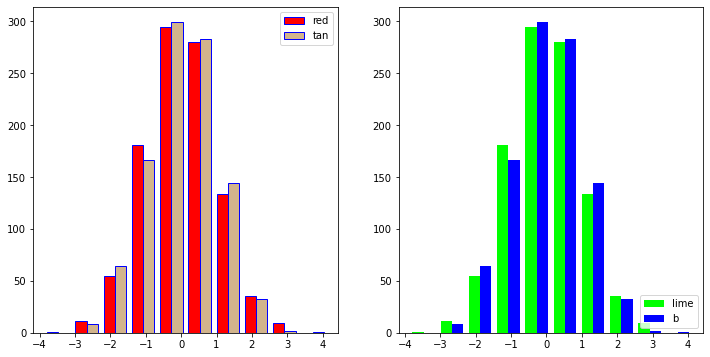

In [25]:
#plt.figure(figsize=(12,6))
#fig.add_axes([10,400,1,1])
n_bins = 10
x = np.random.randn(1000,2)
fig , axes = plt.subplots(1,2,figsize = (12,6))
ax,ax1 = axes.flatten()
# edgecolor()and linewidth() for edges of the bar
ax.hist(x,n_bins , histtype = 'bar',color = ['red','tan'],label = ['red','tan'],linewidth = 1,edgecolor = 'b')
ax1.hist(x,n_bins , histtype = 'bar',color = ['lime','b'],label = ['lime','b'])
ax1.legend(loc = 'lower right')
ax.legend()
print(np.size(x))
print(np.shape(x))
print(x)

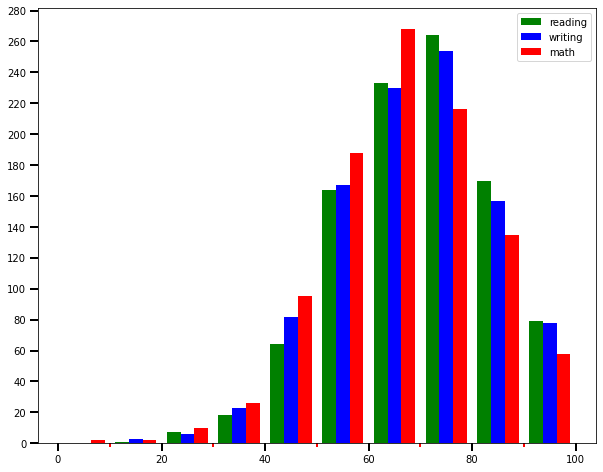

In [118]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
"""bins = 10
plt.hist(Sd['reading score'],bins,color='tan',label = 'reading score',linewidth = 1,edgecolor = 'b')
plt.legend(prop={'size':8})
plt.show() """
fig , axes = plt.subplots(1,1,figsize = (10,8))
bins = 10
axes.hist([Sd['reading score'],Sd['writing score'],Sd['math score']],bins,color = ['g','b','r'],label = ['reading','writing','math'])
axes.legend()
axes = plt.gca()
# n= 2 represents how many minor-ticks you wants
axes.xaxis.set_major_locator(MultipleLocator(20))
axes.yaxis.set_major_locator(MultipleLocator(20))
axes.xaxis.set_minor_locator(AutoMinorLocator(n = 2))
#ax.xaxis.set_minor_formatter(FormatStrFormatter('%d')) #it have no effect no minor ticks

# Change the appearance of ticks, tick labels, and gridlines.
axes.tick_params(which='both', width=2)
axes.tick_params(which='major', length=8)
axes.tick_params(which='minor', length=4, color='r')

In [95]:
plt.ticker.locater

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

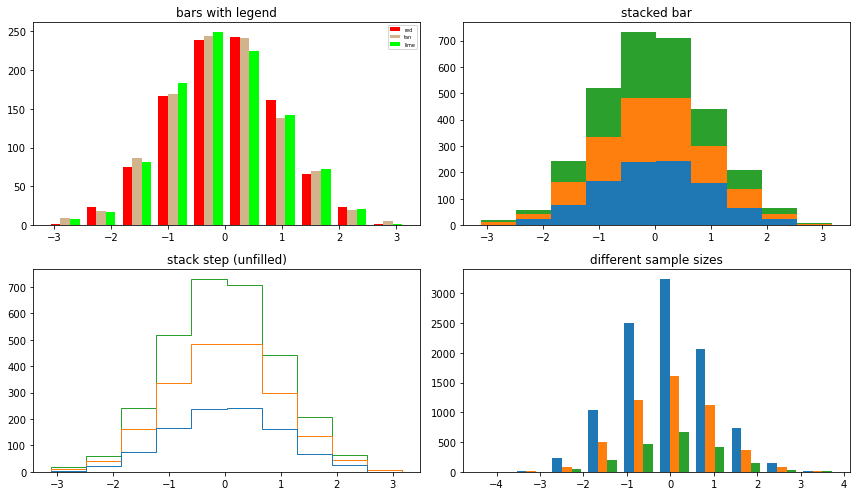

(3,)


In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (12,7))
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan','lime']
ax0.hist(x, n_bins, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 5})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()
print(np.shape(x_multi))

In [4]:
x

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       ...,
       [-1.30322008,  0.46675065,  0.16110632],
       [ 0.32003193,  2.07917666, -0.90746598],
       [-0.19240421, -1.21251574, -0.08059852]])

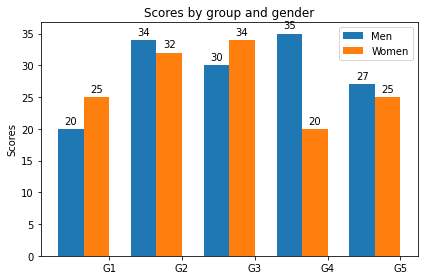

[0 1 2 3 4]


In [30]:

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2 , men_means, width, label='Men')
rects2 = ax.bar(x+width/2 , women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
print(x)

KeyError: 'math score'

<Figure size 1152x720 with 0 Axes>

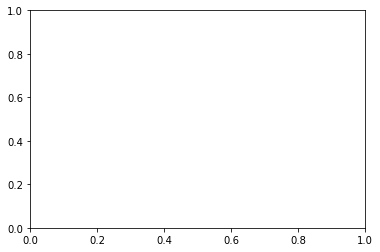

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
labels = ['female','male']
x = np.arange(len(df.index))
width = 0.35
fig , ax = plt.subplots()
rects1 = ax.bar(x-width/2, df['math score'] , width , label = 'math')
rects1 = ax.bar(x+width/2.5, df['reading score'] , width , label = 'reading')
rects1 = ax.bar(x+width, df['writing score'] , width , label = 'writing')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x+width/3)
ax.set_xticklabels(labels)
ax.legend(loc = 'center')

plt.show()

,column1,column2,column3
0,42.0,4.0,25.0
1,13.0,12.0,61.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [49]:
df

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [77]:
          ab             channel   booked
0    control             book_it     466
1    control          contact_me     536
2    control             instant     17
3  treatment             book_it     494
4  treatment          contact_me     56
5  treatment             instant     22

<BarContainer object of 2 artists>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'ab':['control','control','control','treatment','treatment','treatment'],
                   'channel':['book_it','contact_me','instant','book_it','contact_me','instant'],
                   'booked':[466,536,17,494,56,22]})
df

,ab,channel,booked
0,control,book_it,466
1,control,contact_me,536
2,control,instant,17
3,treatment,book_it,494
4,treatment,contact_me,56
5,treatment,instant,22


<BarContainer object of 6 artists>

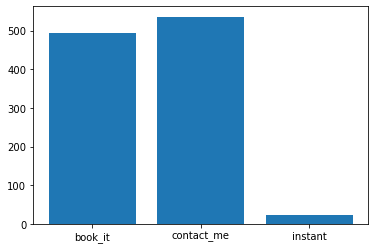

In [30]:
plt.bar(df['channel'],df['booked'])

ab
control      AxesSubplot(0.125,0.125;0.775x0.755)
treatment    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

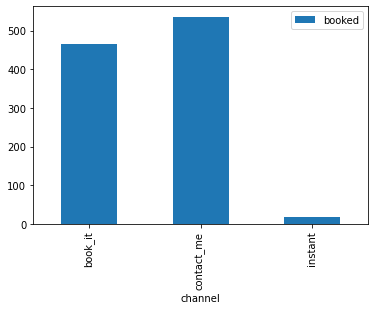

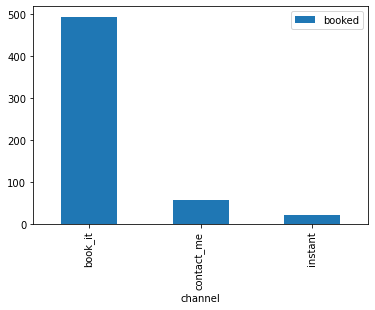

In [36]:
df.groupby(df['ab']).plot(kind = 'bar',x = 'channel',y = 'booked')

In [38]:
# Return reshaped DataFrame organized by given index / column values.
df2 = df.pivot(index = 'channel',columns='ab',values='booked')

In [41]:
df2

ab,control,treatment
channel,,
book_it,466,494
contact_me,536,56
instant,17,22


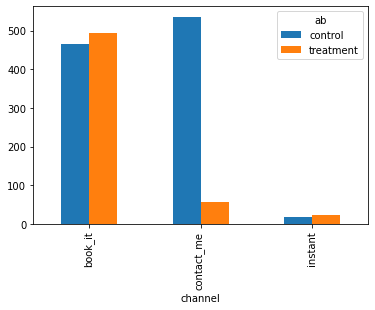

In [43]:
df2.plot.bar()

In [37]:
Sd.head(2)

,gender,race,parent,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,ovrall pass
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P


In [46]:
# Understanding skewnwss and Kurtosis concepts
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(Sd['reading score']))
print(kurtosis(Sd['math score']))

-0.25871569927829347
0.26759715461497846


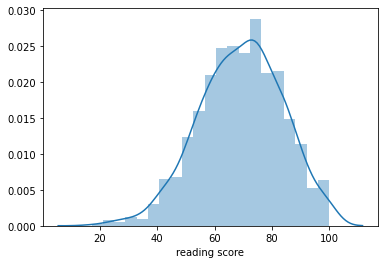

In [47]:
import seaborn as sns
sns.distplot(Sd['reading score'])

In [5]:
import pandas as pd
import numpy as np
raw_data = {'column1': [42,13, np.nan, np.nan],
        'column2': [4,12, np.nan, np.nan],
        'column3': [25,61, np.nan, np.nan]}
df = pd.DataFrame(raw_data)
df

,column1,column2,column3
0,42.0,4.0,25.0
1,13.0,12.0,61.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [6]:
df.dropna(axis=1,how='all',inplace=True) # Inplace will actually replace it with original data set
# axis = 1,how = 'any' >>> if a column have any null then drop the column
# axis = 1,how = 'all' >>> if a column have all null then drop the column
# axis = 0,how = 'any' >>> if a row have any null then drop the row
# axis = 0,how = 'all' >>> if a row have all null then drop the row

In [7]:
df

,column1,column2,column3
0,42.0,4.0,25.0
1,13.0,12.0,61.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
